In [2]:
import csv
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style
import math
import datetime


In [4]:
style.use('ggplot')
df = pd.read_csv('/Users/xujiarui/Desktop/数据/data_2.csv',parse_dates = True, index_col=0, encoding = 'gb2312')
df


,Close
data,
2016-01-04,3469.0660
2016-01-05,3478.7800
2016-01-06,3539.8080
2016-01-07,3294.3840
2016-01-08,3361.5630
...,...
2022-01-24,4786.7377
2022-01-25,4678.4511
2022-01-26,4712.3109


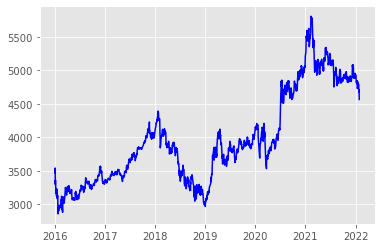

<Figure size 8640x432 with 0 Axes>

In [14]:

plt.plot(df,c = 'b')
plt.figure(figsize=(12,6))
plt.show()

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
df1=min_max_scaler.fit_transform(df)
df = pd.DataFrame(df1, columns=df.columns)
df.tail()

,Close
1475,0.654369
1476,0.617711
1477,0.629173
1478,0.597882
1479,0.578889


In [60]:
stock=df
feanum=1
window=5
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.values#pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum
cut=150#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [61]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1324, 5, 1)
y_train (1324,)
X_test (150, 5, 1)
y_test (150,)


In [62]:
X_train=X_train.reshape(len(X_train),window)
y_train=y_train.reshape(len(X_train))
X_test=X_test.reshape(cut,window)
y_test=y_test.reshape(cut)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1324, 5)
y_train (1324,)
X_test (150, 5)
y_test (150,)


In [63]:
from sklearn.svm import SVR  
svr = SVR(kernel='rbf', gamma=0.1,C=22.8008) #rbf是高斯核函数，g是核函数参数
model = svr.fit(X_train, y_train)

In [64]:
y_train_predict=model.predict(X_train)

Text(0.5, 1.0, 'Train Data')

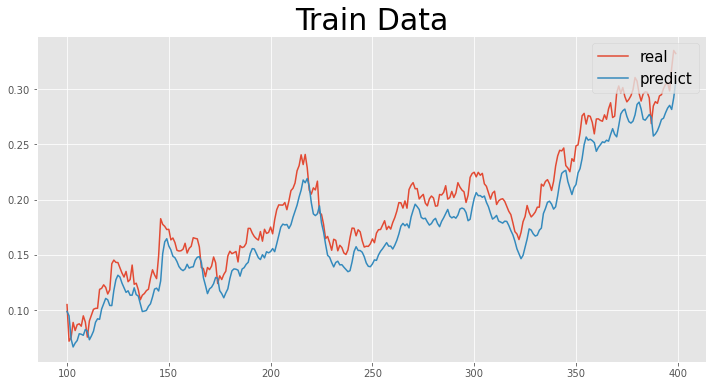

In [65]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [66]:
#在测试集上的预测
y_test_predict=model.predict(X_test)

Text(0.5, 1.0, 'Test Data')

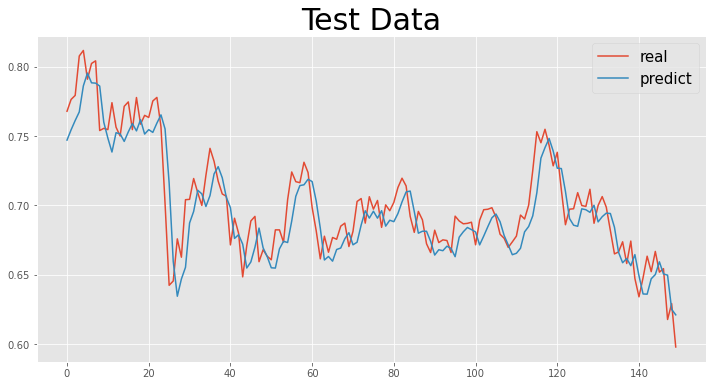

In [67]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1)
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [68]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )

训练集上的MAE/MSE/MAPE
0.020097558139437595
0.0005967665917510389
10.121822049340967
测试集上的MAE/MSE/MAPE
0.01497220372775657
0.0003538134207822258
2.152631625943861
